# Anonymous Messages
This notebook contains the generation of results for the Tyche paper's example use of Tyche for knowledge extraction from a set of messages, where the source that sent each message is unknown, but the recipient is known. This notebook contains the analysis that is presented in the Tyche paper. A walkthrough describing this use-case of Tyche in more detail is given in walkthrough.ipynb.

## 1. Imports

In [1]:
%matplotlib inline

from examples.anonymous_messages.tyche_model import *
from examples.anonymous_messages.problog_model import *
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 16})


## 2. Ground-Truth Belief Model
The ground truth model is used to generate observations. It is also used as a reference point to see how well Tyche and ProbLog can approximate the true model.

In [2]:
from examples.anonymous_messages.testing import construct_target_model

gt_model = construct_target_model()
print(f"Ground-Truth Belief Model:\n{gt_model}")


Ground-Truth Belief Model:
- Alice(capitalises_first_word=0.800, is_positive=0.400, uses_emoji=0.100, conversed_with=Exclusive{25.0%: Bob, 75.0%: Jeff})
- Bob(capitalises_first_word=0.400, is_positive=0.150, uses_emoji=0.900, conversed_with=Exclusive{60.0%: Alice, 40.0%: Jeff})
- Jeff(capitalises_first_word=0.500, is_positive=0.500, uses_emoji=0.500, conversed_with=Exclusive{70.0%: Alice, 30.0%: Bob})


## 3. Tyche & ProbLog Implementations

In [3]:
tyche_imp = TycheImplementation()
problog_imp = ProbLogImplementation()

## 4. Estimating the author of sets of messages

In [4]:
from examples.anonymous_messages.testing import run_inference_test

no_tests = 10_000
min_messages = 1
max_messages = 10
rng_seed = 42

print("--------------------------")
print("   Tyche Implementation   ")
print("--------------------------")
tyche_inference_results = run_inference_test(
    tyche_imp, no_tests=no_tests, min_messages=min_messages,
    max_messages=max_messages, rng_seed=rng_seed
)

print()
print("----------------------------")
print("   ProbLog Implementation   ")
print("----------------------------")
problog_inference_results = run_inference_test(
    problog_imp, no_tests=no_tests, min_messages=min_messages,
    max_messages=max_messages, rng_seed=rng_seed
)


--------------------------
   Tyche Implementation   
--------------------------
Evaluating the accuracy of the Tyche implementation to predict the author of random sets of messages (10000 tests per person, per message count)
.. 1 message:    Bob = 74.8%, Alice = 76.9%, Jeff = 90.4%     (0.06 ms per evaluation)
.. 2 messages:   Bob = 81.9%, Alice = 84.5%, Jeff = 95.5%     (0.12 ms per evaluation)
.. 3 messages:   Bob = 85.2%, Alice = 88.2%, Jeff = 98.0%     (0.20 ms per evaluation)
.. 4 messages:   Bob = 89.2%, Alice = 91.0%, Jeff = 99.0%     (0.24 ms per evaluation)
.. 5 messages:   Bob = 91.1%, Alice = 92.8%, Jeff = 99.5%     (0.29 ms per evaluation)
.. 6 messages:   Bob = 92.5%, Alice = 94.2%, Jeff = 99.8%     (0.33 ms per evaluation)
.. 7 messages:   Bob = 94.5%, Alice = 95.3%, Jeff = 99.9%     (0.38 ms per evaluation)
.. 8 messages:   Bob = 95.4%, Alice = 96.6%, Jeff = 100.0%    (0.46 ms per evaluation)
.. 9 messages:   Bob = 96.3%, Alice = 97.6%, Jeff = 100.0%    (0.49 ms per eva

In [5]:

def plot_inference_accuracy_results(
        name: Optional[str],
        inference_results: tuple[list[int], list[dict[str, float]], list[float]]
) -> plt.Figure:

    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(w=8, h=5)
    styles = ['-o', '--D', '-.s']
    colors = [0.0, 0.5, 0.25]

    no_messages, correct_percentages, _ = inference_results
    for index, person in enumerate(gt_model.all):
        results = correct_percentages[person.name]
        col = colors[index]
        ax.plot(no_messages, results, styles[index], color=(col, col, col), label=person.name)

    ax.legend(loc='lower right')
    ax.set_title("Accuracy of author estimation" + (f" ({name})" if name is not None else ""))
    ax.set_xlim(min(no_messages), max(no_messages))
    ax.set_xlabel("Number of messages in each generated conversation")
    ax.set_ylim(50, 100)
    ax.set_ylabel("Accuracy of author estimation (%)")
    return fig


def plot_inference_duration_results(
        name: Optional[str],
        inference_results: tuple[list[int], list[dict[str, float]], list[float]],
        ylim: float
) -> plt.Figure:

    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(w=8, h=5)

    no_messages, _, durations_ms = inference_results

    ax.plot(no_messages, durations_ms, '-o', color=(0.0, 0.0, 0.0))

    ax.set_title("Duration of author estimation" + (f" ({name})" if name is not None else ""))
    ax.set_xlim(min(no_messages), max(no_messages))
    ax.set_xlabel("Number of messages in each generated conversation")
    ax.set_ylim(0, ylim)
    ax.set_ylabel("Duration taken to infer author (ms)")
    return fig


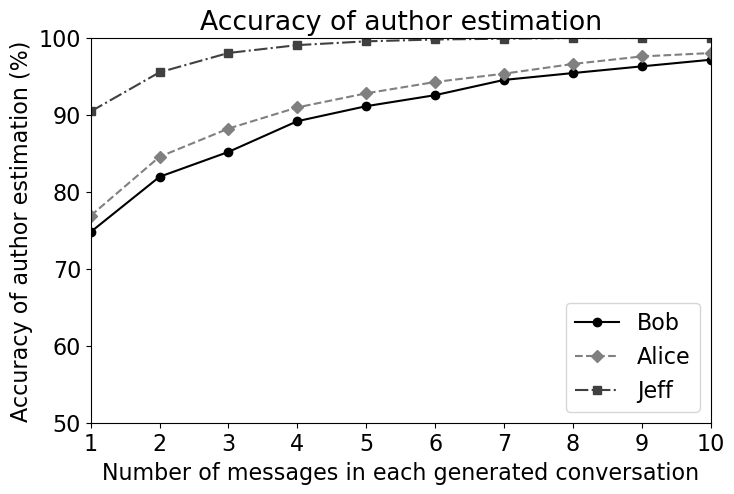

In [6]:
import os

accuracy_fig = plot_inference_accuracy_results(None, tyche_inference_results)
accuracy_fig.savefig("accuracies.pgf")


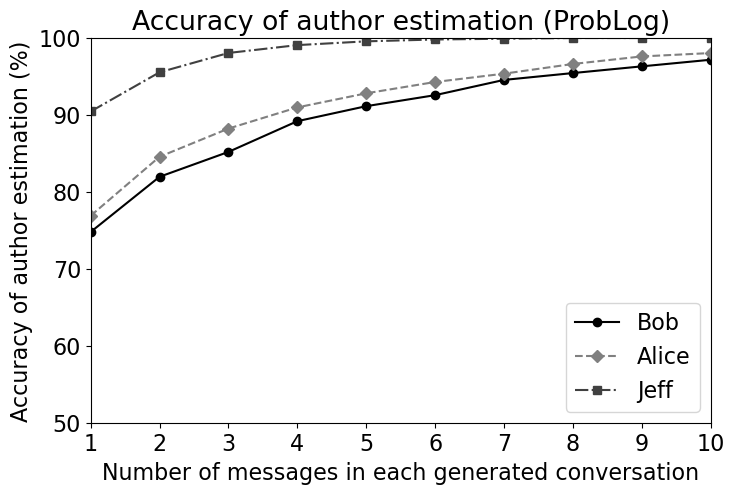

In [7]:
_ = plot_inference_accuracy_results("ProbLog", problog_inference_results)

## 5. Learning the Belief Model

### 5.1. Tyche Implementation

In [8]:
from examples.anonymous_messages.testing import run_learning_test


no_trials = 10
no_observations = 5000
repetitions = 2
min_messages = 2
max_messages: int = 4
rng_seed: int = 42

run_learning_test(
    tyche_imp, no_trials=no_trials, no_observations=no_observations,
    repetitions=repetitions, min_messages=min_messages,
    max_messages=max_messages, rng_seed=rng_seed
)

Running with 10 trials, 5000 observations per trial, 2 repetitions of those observations, and conversations of 2 to 4 messages
.. running trial 1
  * took 7.42 seconds
.. running trial 2
  * took 7.37 seconds
.. running trial 3
  * took 7.39 seconds
.. running trial 4
  * took 7.43 seconds
.. running trial 5
  * took 7.27 seconds
.. running trial 6
  * took 7.36 seconds
.. running trial 7
  * took 7.38 seconds
.. running trial 8
  * took 7.38 seconds
.. running trial 9
  * took 7.41 seconds
.. running trial 10
  * took 7.34 seconds

Example Observations:
- Observe at Jeff: [conversed_with]((¬uses_emoji ∧ capitalises_first_word ∧ ¬is_positive ∧ ¬uses_emoji ∧ ¬capitalises_first_word ∧ ¬is_positive))
- Observe at Jeff: [conversed_with]((¬uses_emoji ∧ capitalises_first_word ∧ is_positive ∧ ¬uses_emoji ∧ capitalises_first_word ∧ is_positive ∧ ¬uses_emoji ∧ capitalises_first_word ∧ ¬is_positive))
- Observe at Bob: [conversed_with]((¬uses_emoji ∧ ¬capitalises_first_word ∧ is_positive ∧ uses_e

### 5.2. ProbLog Implementation

In [9]:
run_learning_test(
    problog_imp, no_trials=no_trials, no_observations=no_observations,
    repetitions=repetitions, min_messages=min_messages,
    max_messages=max_messages, rng_seed=rng_seed
)


Running with 10 trials, 5000 observations per trial, 2 repetitions of those observations, and conversations of 2 to 4 messages
.. running trial 1
  * took 1573.09 seconds
.. running trial 2
  * took 1620.03 seconds
.. running trial 3
  * took 13665.95 seconds
.. running trial 4
  * took 44085.48 seconds
.. running trial 5
  * took 1552.39 seconds
.. running trial 6
  * took 1547.86 seconds
.. running trial 7
  * took 1624.41 seconds
.. running trial 8
  * took 1667.20 seconds
.. running trial 9
  * took 1590.57 seconds
.. running trial 10
  * took 1588.26 seconds

Example Observations:
- Observe at Jeff: [conversed_with]((¬uses_emoji ∧ capitalises_first_word ∧ ¬is_positive ∧ ¬uses_emoji ∧ ¬capitalises_first_word ∧ ¬is_positive))
- Observe at Jeff: [conversed_with]((¬uses_emoji ∧ capitalises_first_word ∧ is_positive ∧ ¬uses_emoji ∧ capitalises_first_word ∧ is_positive ∧ ¬uses_emoji ∧ capitalises_first_word ∧ ¬is_positive))
- Observe at Bob: [conversed_with]((¬uses_emoji ∧ ¬capitalises_f